<a href="https://colab.research.google.com/github/YanLAMgg/Customer_Behaviour_Tourism/blob/main/Customer_Behaviour_Tourism_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主要目的

1. 探索用户行为数据


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.subplots as sp

from sklearn.preprocessing import StandardScaler
from textblob import TextBlob
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# file_path = '/content/Customer_behaviour_Tourism.csv/'
# file_name = 'Customer_behaviour_Tourism.csv'

# df = pd.read_csv(f'{file_path}{file_name}')

df = pd.read_csv('/content/drive/MyDrive/Customer Behaviour Tourism/Customer_behaviour_Tourism.csv')

print(df.shape)
print(df.columns)
df.head()

(11760, 17)
Index(['UserID', 'Taken_product', 'Yearly_avg_view_on_travel_page',
       'preferred_device', 'total_likes_on_outstation_checkin_given',
       'yearly_avg_Outstation_checkins', 'member_in_family',
       'preferred_location_type', 'Yearly_avg_comment_on_travel_page',
       'total_likes_on_outofstation_checkin_received',
       'week_since_last_outstation_checkin', 'following_company_page',
       'montly_avg_comment_on_company_page', 'working_flag',
       'travelling_network_rating', 'Adult_flag',
       'Daily_Avg_mins_spend_on_traveling_page'],
      dtype='object')


,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0


In [9]:
round(df.isna().sum() / len(df), 2).reset_index().rename(columns={0: 'Missing_Rate'})

,index,Missing_Rate
0,UserID,0.00
1,Taken_product,0.00
2,Yearly_avg_view_on_travel_page,0.05
3,preferred_device,0.00
4,total_likes_on_outstation_checkin_given,0.03
5,yearly_avg_Outstation_checkins,0.01
6,member_in_family,0.00
7,preferred_location_type,0.00
8,Yearly_avg_comment_on_travel_page,0.02
9,total_likes_on_outofstation_checkin_received,0.00


In [10]:
df = df.dropna(ignore_index=True)
df.shape

(10455, 17)

In [12]:
df = df.dropna()
df.shape

(10455, 17)

In [13]:
df.drop_duplicates()

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0.0,8.0
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1.0,10.0
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0.0,7.0
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0.0,8.0
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10450,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1.0,23.0
10451,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1.0,11.0
10452,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1.0,12.0
10453,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0.0,20.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10455 entries, 0 to 10454
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10455 non-null  int64  
 1   Taken_product                                 10455 non-null  object 
 2   Yearly_avg_view_on_travel_page                10455 non-null  float64
 3   preferred_device                              10455 non-null  object 
 4   total_likes_on_outstation_checkin_given       10455 non-null  float64
 5   yearly_avg_Outstation_checkins                10455 non-null  object 
 6   member_in_family                              10455 non-null  object 
 7   preferred_location_type                       10455 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10455 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10455 non-null 

In [15]:
df = df[df['yearly_avg_Outstation_checkins'] != '*']
df['yearly_avg_Outstation_checkins'] = df['yearly_avg_Outstation_checkins'].astype(int)
df['member_in_family'] = df['member_in_family'].replace('Three', 3)
df['member_in_family'] = df['member_in_family'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10454 entries, 0 to 10454
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        10454 non-null  int64  
 1   Taken_product                                 10454 non-null  object 
 2   Yearly_avg_view_on_travel_page                10454 non-null  float64
 3   preferred_device                              10454 non-null  object 
 4   total_likes_on_outstation_checkin_given       10454 non-null  float64
 5   yearly_avg_Outstation_checkins                10454 non-null  int64  
 6   member_in_family                              10454 non-null  int64  
 7   preferred_location_type                       10454 non-null  object 
 8   Yearly_avg_comment_on_travel_page             10454 non-null  float64
 9   total_likes_on_outofstation_checkin_received  10454 non-null  int6

### 离散变量描述

In [16]:
df.select_dtypes('object')

,Taken_product,preferred_device,preferred_location_type,following_company_page,working_flag
0,Yes,iOS and Android,Financial,Yes,No
1,No,iOS,Financial,No,Yes
2,Yes,iOS and Android,Other,Yes,No
3,No,iOS,Financial,Yes,No
4,No,iOS and Android,Medical,No,No
...,...,...,...,...,...
10450,No,Laptop,Historical site,No,No
10451,No,Tab,Historical site,No,No
10452,No,Tab,Beach,Yes,Yes
10453,No,Laptop,Historical site,No,No


In [17]:
df['Taken_product'].value_counts()

,count
Taken_product,
No,8761
Yes,1693


In [18]:
# df['preferred_device'].value_counts()
# Define a mapping for replacement
device_mapping= {'iOS and Android': 'Mobile',
          'iOS' : 'Mobile',
          'ANDROID' : 'Mobile',
          'Android': 'Mobile',
          'Android OS' : 'Mobile',
          'Other': 'Mobile',
          'Others' : 'Mobile',
          'Tab' : 'Mobile'}
df['preferred_device'] = df['preferred_device'].replace(device_mapping)
df['preferred_device'].unique()

array(['Mobile', 'Laptop'], dtype=object)

In [19]:
df['preferred_location_type'].value_counts()

,count
preferred_location_type,
Beach,2424
Financial,1874
Historical site,1856
Medical,1448
Big Cities,636
Other,581
Trekking,528
Social media,506
Entertainment,383


In [20]:
# df['following_company_page'].value_counts()

page_mapping= {'Yes': 1,
          'No' : 0}
df['following_company_page'] = df['following_company_page'].replace(page_mapping)
df['following_company_page'] = df['following_company_page'].astype(str)
df['following_company_page'].unique()


array(['1', '0'], dtype=object)

In [21]:
df['working_flag'].value_counts()

,count
working_flag,
No,8845
Yes,1609


In [22]:
df[["travelling_network_rating", "Adult_flag"]]= df[["travelling_network_rating", "Adult_flag"]].astype("object")


## 数据清理

In [23]:
df['Taken_product'].value_counts()

,count
Taken_product,
No,8761
Yes,1693


In [24]:
fig = px.pie(
    df.assign(
        ClassMap=df.Taken_product.map({'No': "Not Taken", "Yes": "Taken"})),
    names="ClassMap", hole=0.5,color_discrete_sequence=["#79a5db", "#e0a580"])

fig.update_layout(height=450,width=600, font_color="#28838a",title_font_size=16,  showlegend=False,)
fig.add_annotation( x=0.5, y=0.5, align="center", xref="paper",yref="paper", showarrow=False, font_size=20, text="Target<br>Overview",)
fig.update_traces(hovertemplate=None, textposition="outside", texttemplate="%{label}<br>%{value} - %{percent}",
    textfont_size=16,rotation=-20, marker_line_width=25,  marker_line_color='#ffffff',)
fig.show()

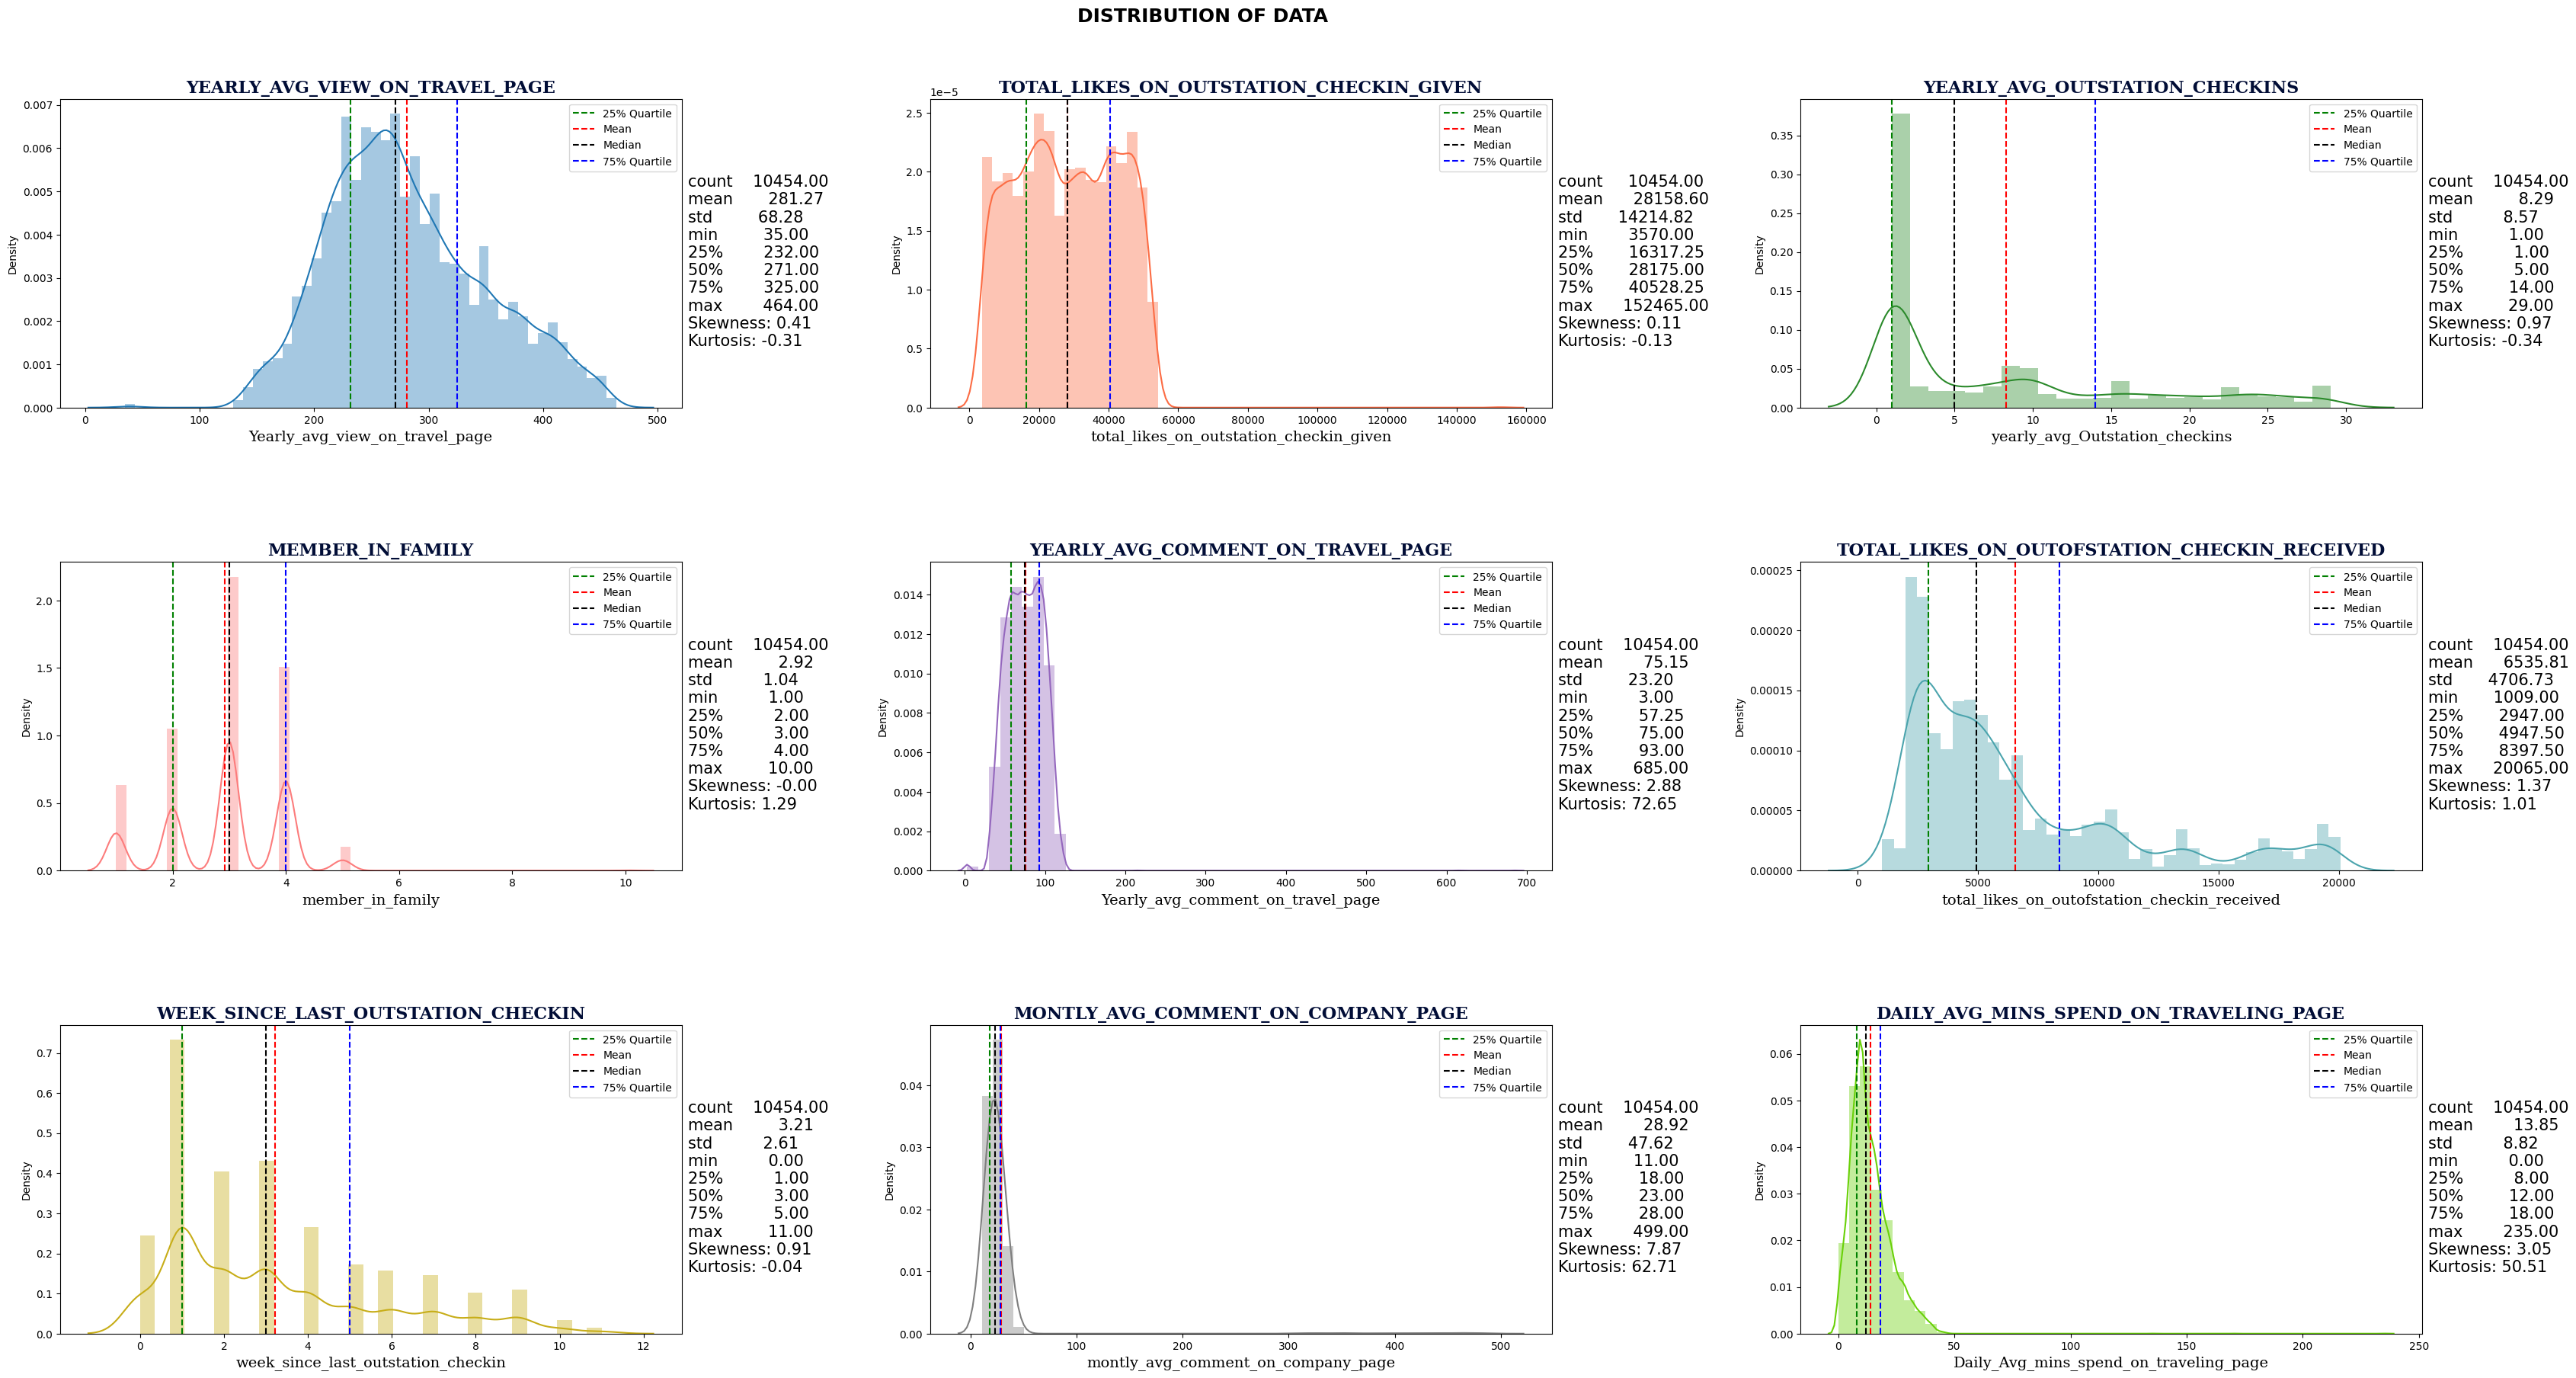

In [25]:
colours = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108'];
axtitle_dict = {'family': 'serif','color':  '#010D36','weight': 'bold','size': 16}
axlab_dict = {'family': 'serif', 'color': 'black','size': 14}


num_columns = df.select_dtypes(include=['float64', 'int64']).columns.drop(['UserID'])

# Distribution of Numeric Columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[40, 20])
fig.suptitle('DISTRIBUTION OF DATA', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(num_columns):
    ax = fig.add_subplot(3, 3, i + 1)
    # Plot the histogram
    sns.distplot(df[col], color=colours[i], ax=ax)
    ax.axvline(df[col].quantile(q=0.25), color='green', linestyle='--', label='25% Quartile')
    ax.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    ax.axvline(df[col].median(), color='black', linestyle='--', label='Median')
    ax.axvline(df[col].quantile(q=0.75), color='blue', linestyle='--', label='75% Quartile')
    skewness = round(df[col].skew(), 2)
    kurtosis = round(df[col].kurtosis(), 2)
    description_lines = [line for line in str(df[col].describe().round(2)).split('\n') if 'Name' not in line and 'dtype' not in line]
    description_text = '\n'.join(description_lines)
    description_text += f"\nSkewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}"
    ax.annotate(description_text, xy=(1.01, 0.2), xycoords='axes fraction', fontsize=15)
    ax.set_xlabel(f'{col}', fontdict=axlab_dict)
    ax.set_title(f'{col.upper()}', fontdict=axtitle_dict)
    ax.legend(fontsize=10)
plt.show()

In [26]:
cat_colums = df.select_dtypes(include = ['object'])
def univariateAnalysis_category(cols):
    print("Distribution of", cols)
    print("----------------------------------------------------------------")
    colors = ['#79a5db', '#e0a580', '#6fab90', '#896ca8', '#ADD8E6']
    value_counts = cat_colums[cols].value_counts()
    # Count plot
    fig = px.bar(
        value_counts,
        x=value_counts.index,
        y=value_counts.values,
        title=f'Distribution of {cols}',
        labels={'x': 'Categories', 'y': 'Count'},color_discrete_sequence=[colors])
    fig.update_layout(width=700)
    fig.update_layout(plot_bgcolor='#ffffff', paper_bgcolor='#ffffff')
    fig.show()
    # Donut chart
    percentage = (value_counts / value_counts.sum()) * 100
    fig = px.pie(
        values=percentage, names=value_counts.index,
        labels={'names': 'Categories', 'values': 'Percentage'}, hole=0.5,color_discrete_sequence=colors)
    fig.add_annotation(
        x=0.5, y=0.5, align="center", xref="paper",
        yref="paper", showarrow=False, font_size=15, text=f'{cols}')
    fig.update_layout(legend=dict(x=0.9, y=0.5))
    fig.update_layout(width=700)
    fig.show()
    print("       ")
for x in cat_colums:
    univariateAnalysis_category(x)

Distribution of Taken_product
----------------------------------------------------------------


       
Distribution of preferred_device
----------------------------------------------------------------


       
Distribution of preferred_location_type
----------------------------------------------------------------


       
Distribution of following_company_page
----------------------------------------------------------------


       
Distribution of working_flag
----------------------------------------------------------------


       
Distribution of travelling_network_rating
----------------------------------------------------------------


       
Distribution of Adult_flag
----------------------------------------------------------------


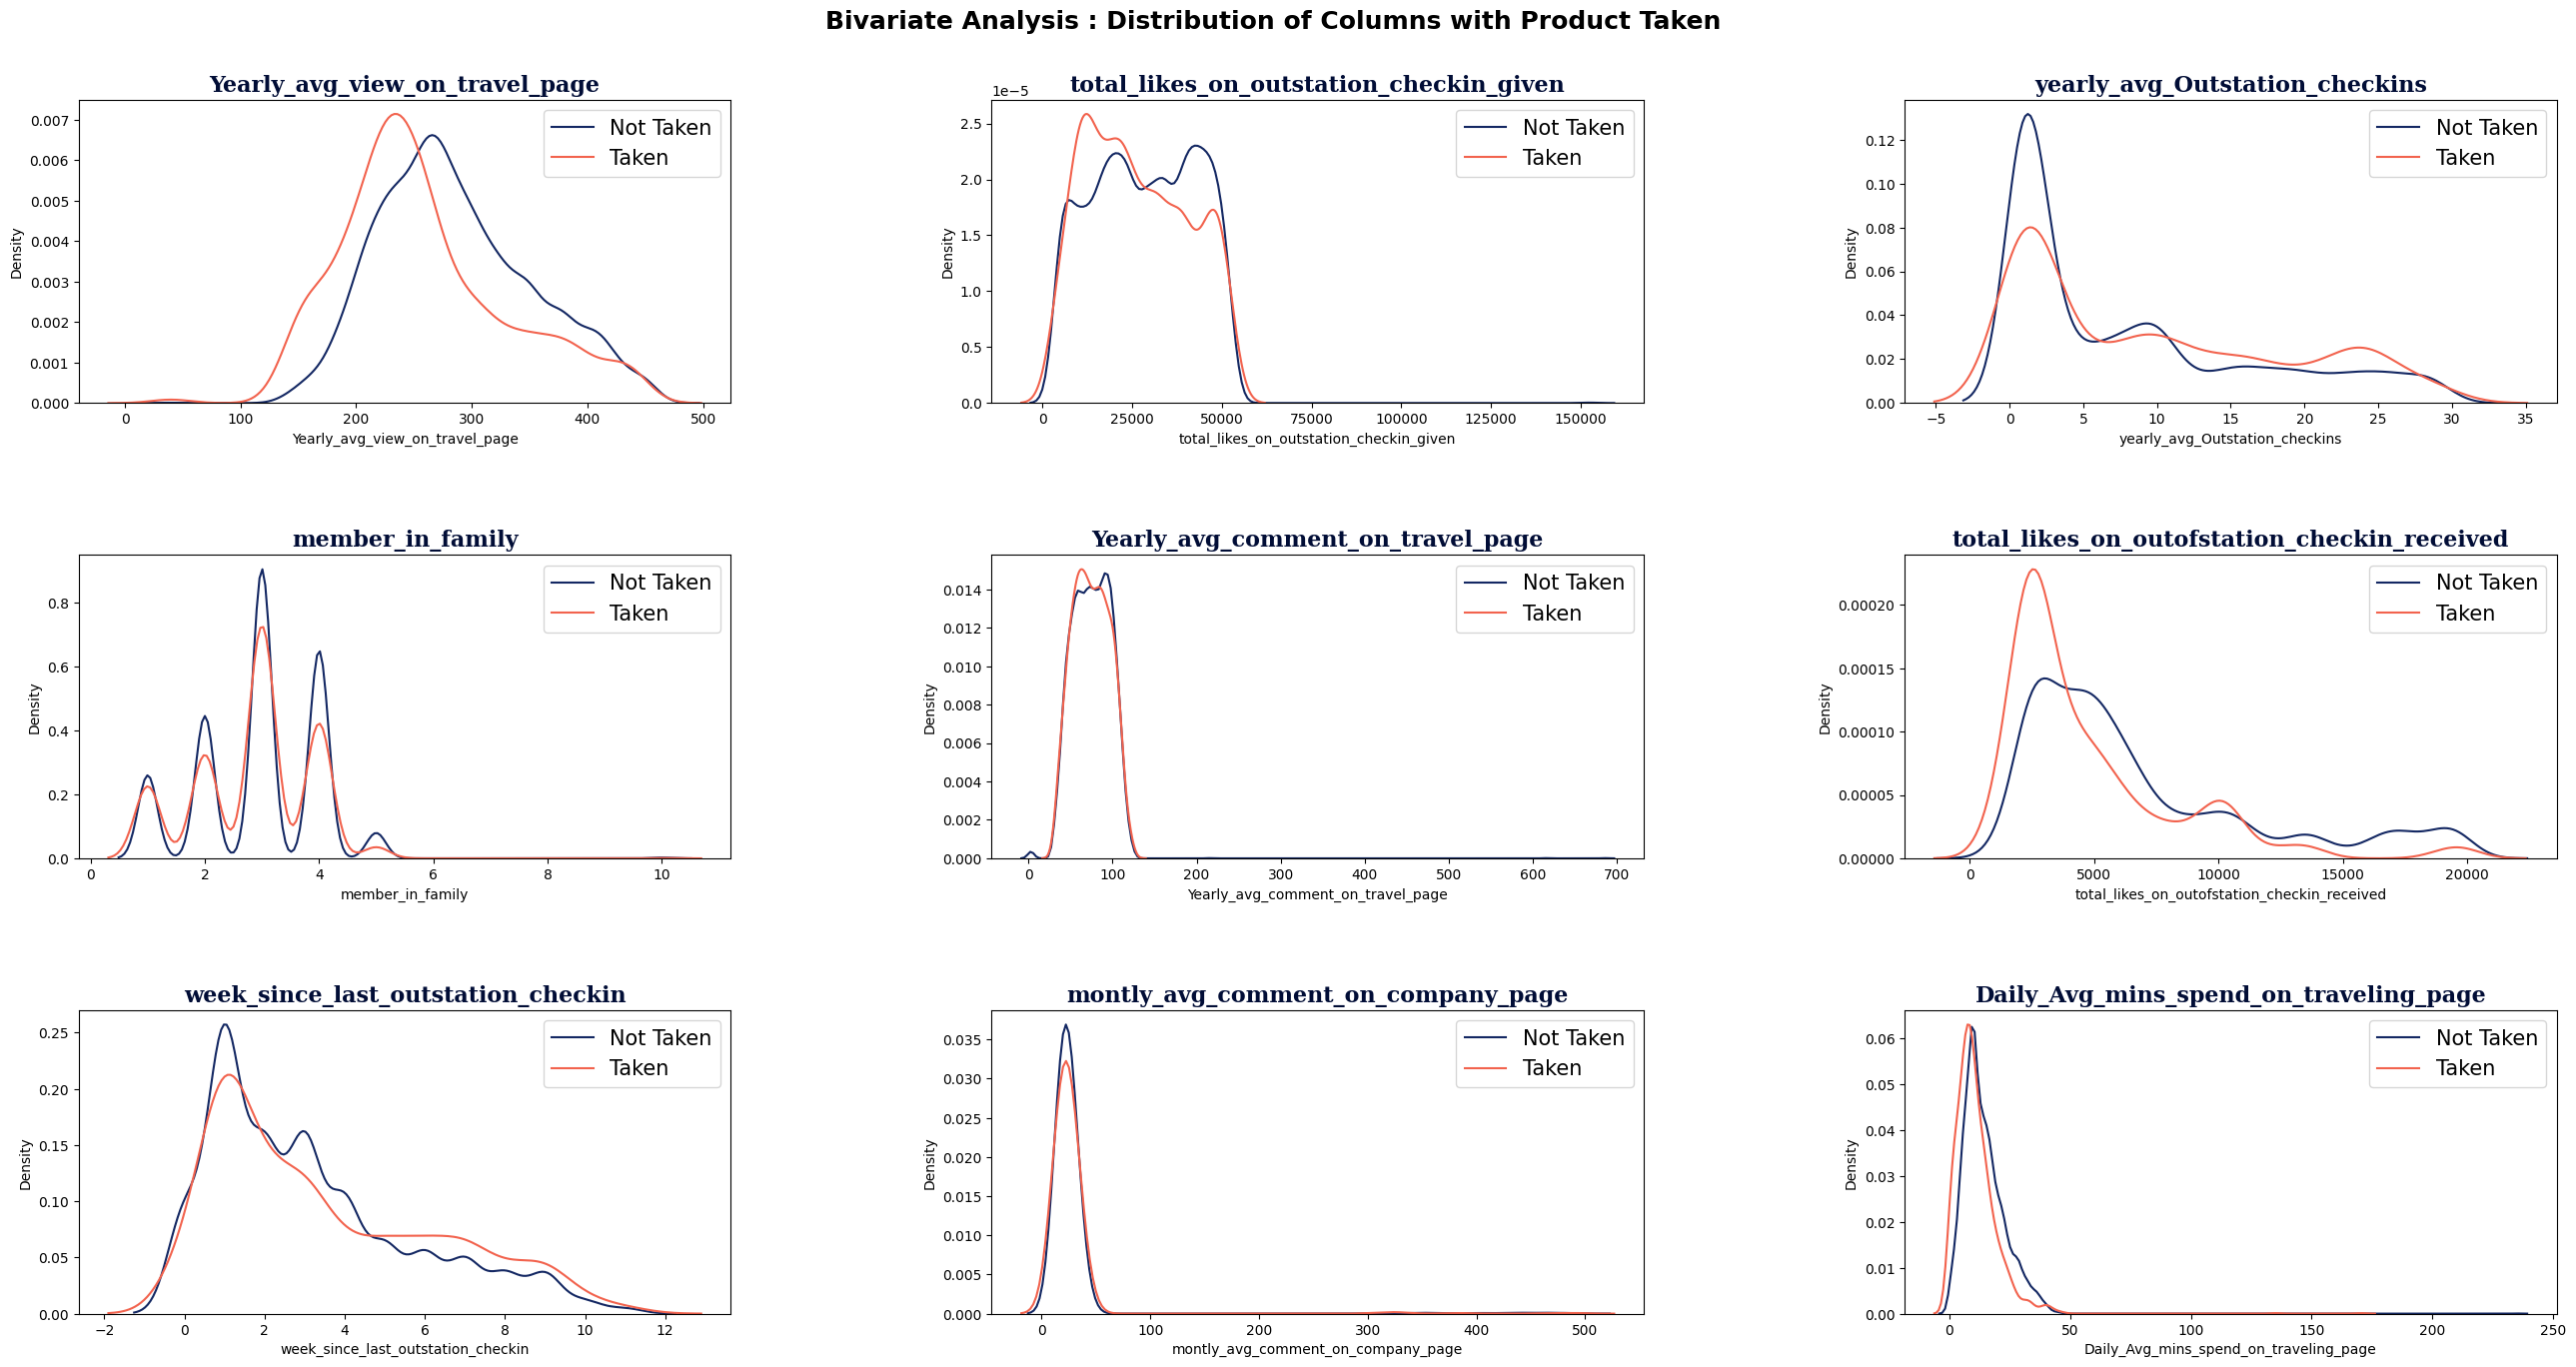

In [27]:
fig = plt.figure(figsize=[32, 15])
fig.suptitle('Bivariate Analysis : Distribution of Columns with Product Taken ', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92)
fig.subplots_adjust(hspace=0.5, wspace=0.4)
for i, col in enumerate(num_columns):
  a = fig.add_subplot(3, 3, i+1)
  sns.distplot(df[df['Taken_product'] == "No"][col], color='#142863', ax=a, hist=False, label='Not Taken')
  sns.distplot(df[df['Taken_product'] == "Yes"][col], color='#f2634e', ax=a, hist=False, label='Taken')
  a.set_title(col, fontdict=axtitle_dict)
  a.legend(fontsize=15)


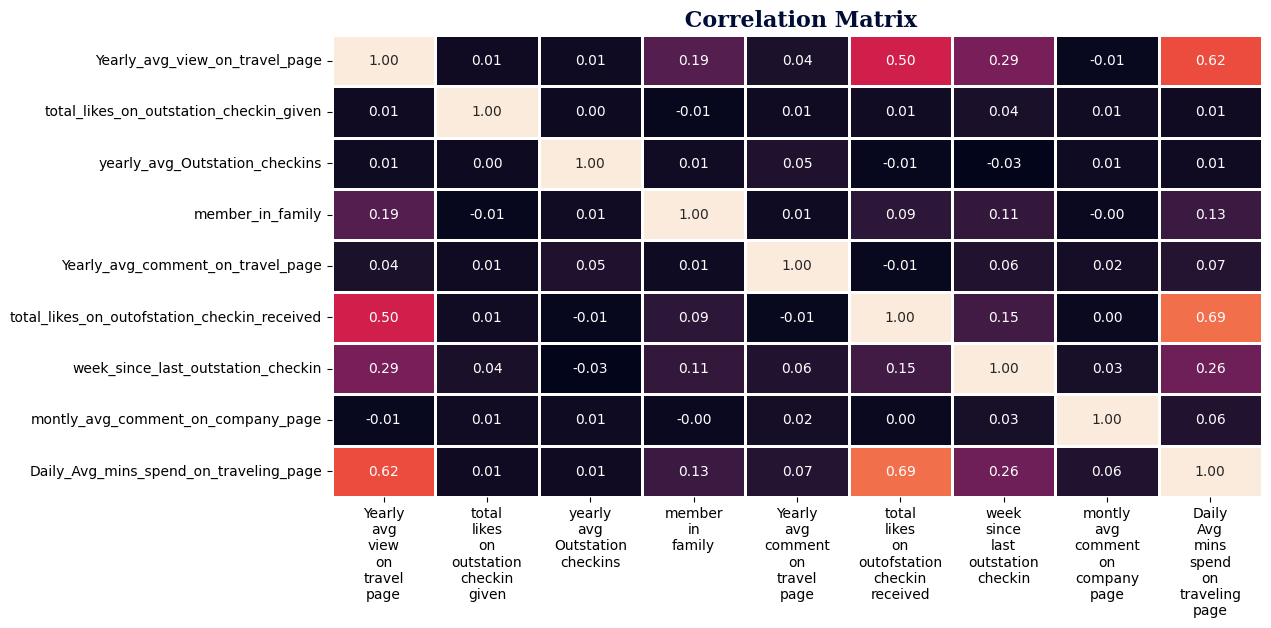

In [28]:
corr = df[num_columns].corr(method='pearson')
fig = plt.subplots(figsize=(12, 6))
ax = sns.heatmap(corr, annot=True, fmt='.2f', cbar=None, linewidth=0.9)
ax.set_xticklabels([label.get_text().replace('_', '\n') for label in ax.get_xticklabels()], rotation=0, horizontalalignment='center')
ax.set_title(' Correlation Matrix', fontdict=axtitle_dict)
plt.show()

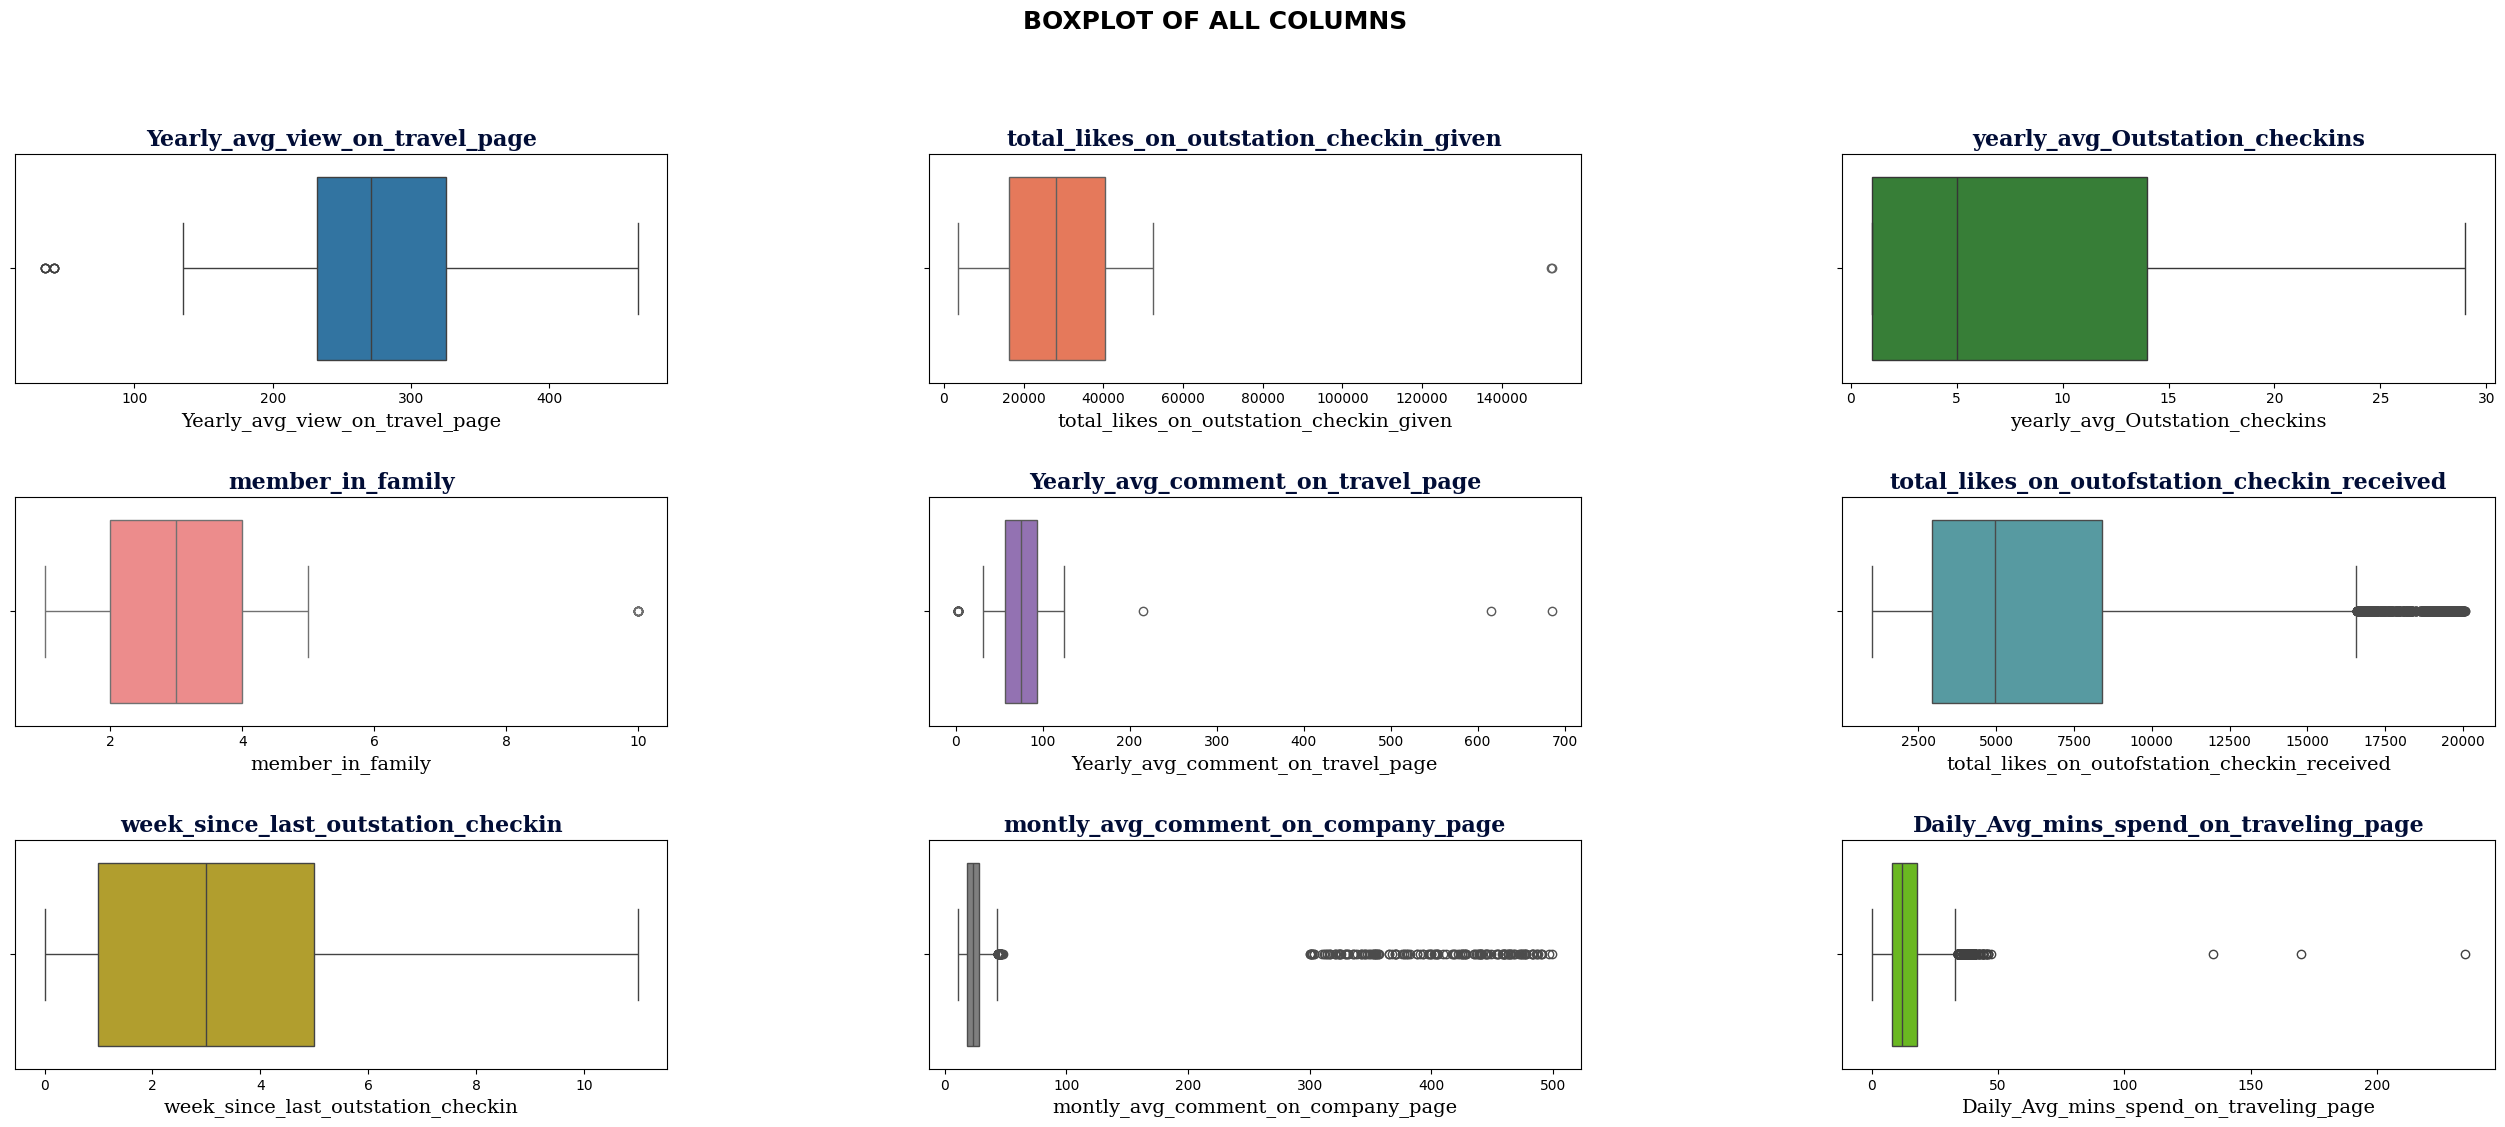

In [29]:
# 异常值分析

plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_columns):
    ax1 = fig.add_subplot(6,3, i+1);
    ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
    ax1.set_title(f'{col}', fontdict=axtitle_dict)
    ax1.set_xlabel(f'{col}', fontdict=axlab_dict)


In [30]:
#Checking numbers of observations beyond Upper & Lower Limit
Q5 = df[num_columns].quantile(0.05)
Q95 = df[num_columns].quantile(0.95)
UL = Q95
LL = Q5
outliers = ((df[num_columns] > UL) | (df[num_columns] < LL)).sum()
print("Number of Observations Beyond Upper & Lower Limit for Each Column:")
display(outliers)

Number of Observations Beyond Upper & Lower Limit for Each Column:


,0
Yearly_avg_view_on_travel_page,1025
total_likes_on_outstation_checkin_given,1045
yearly_avg_Outstation_checkins,433
member_in_family,341
Yearly_avg_comment_on_travel_page,971
total_likes_on_outofstation_checkin_received,1045
week_since_last_outstation_checkin,179
montly_avg_comment_on_company_page,799
Daily_Avg_mins_spend_on_traveling_page,921


In [31]:
#Function which returns the Upper and Lower limit to detect outliers for each feature
def treat_outlier(col):
  q5  , q95 = np.percentile(col, [5, 95])
  return q5, q95

for i in num_columns:
  LR, UR  = treat_outlier(df[i])
  df[i] = np.where(df[i] > UR, UR, df[i])
  df[i] = np.where(df[i] < LR, LR, df[i])


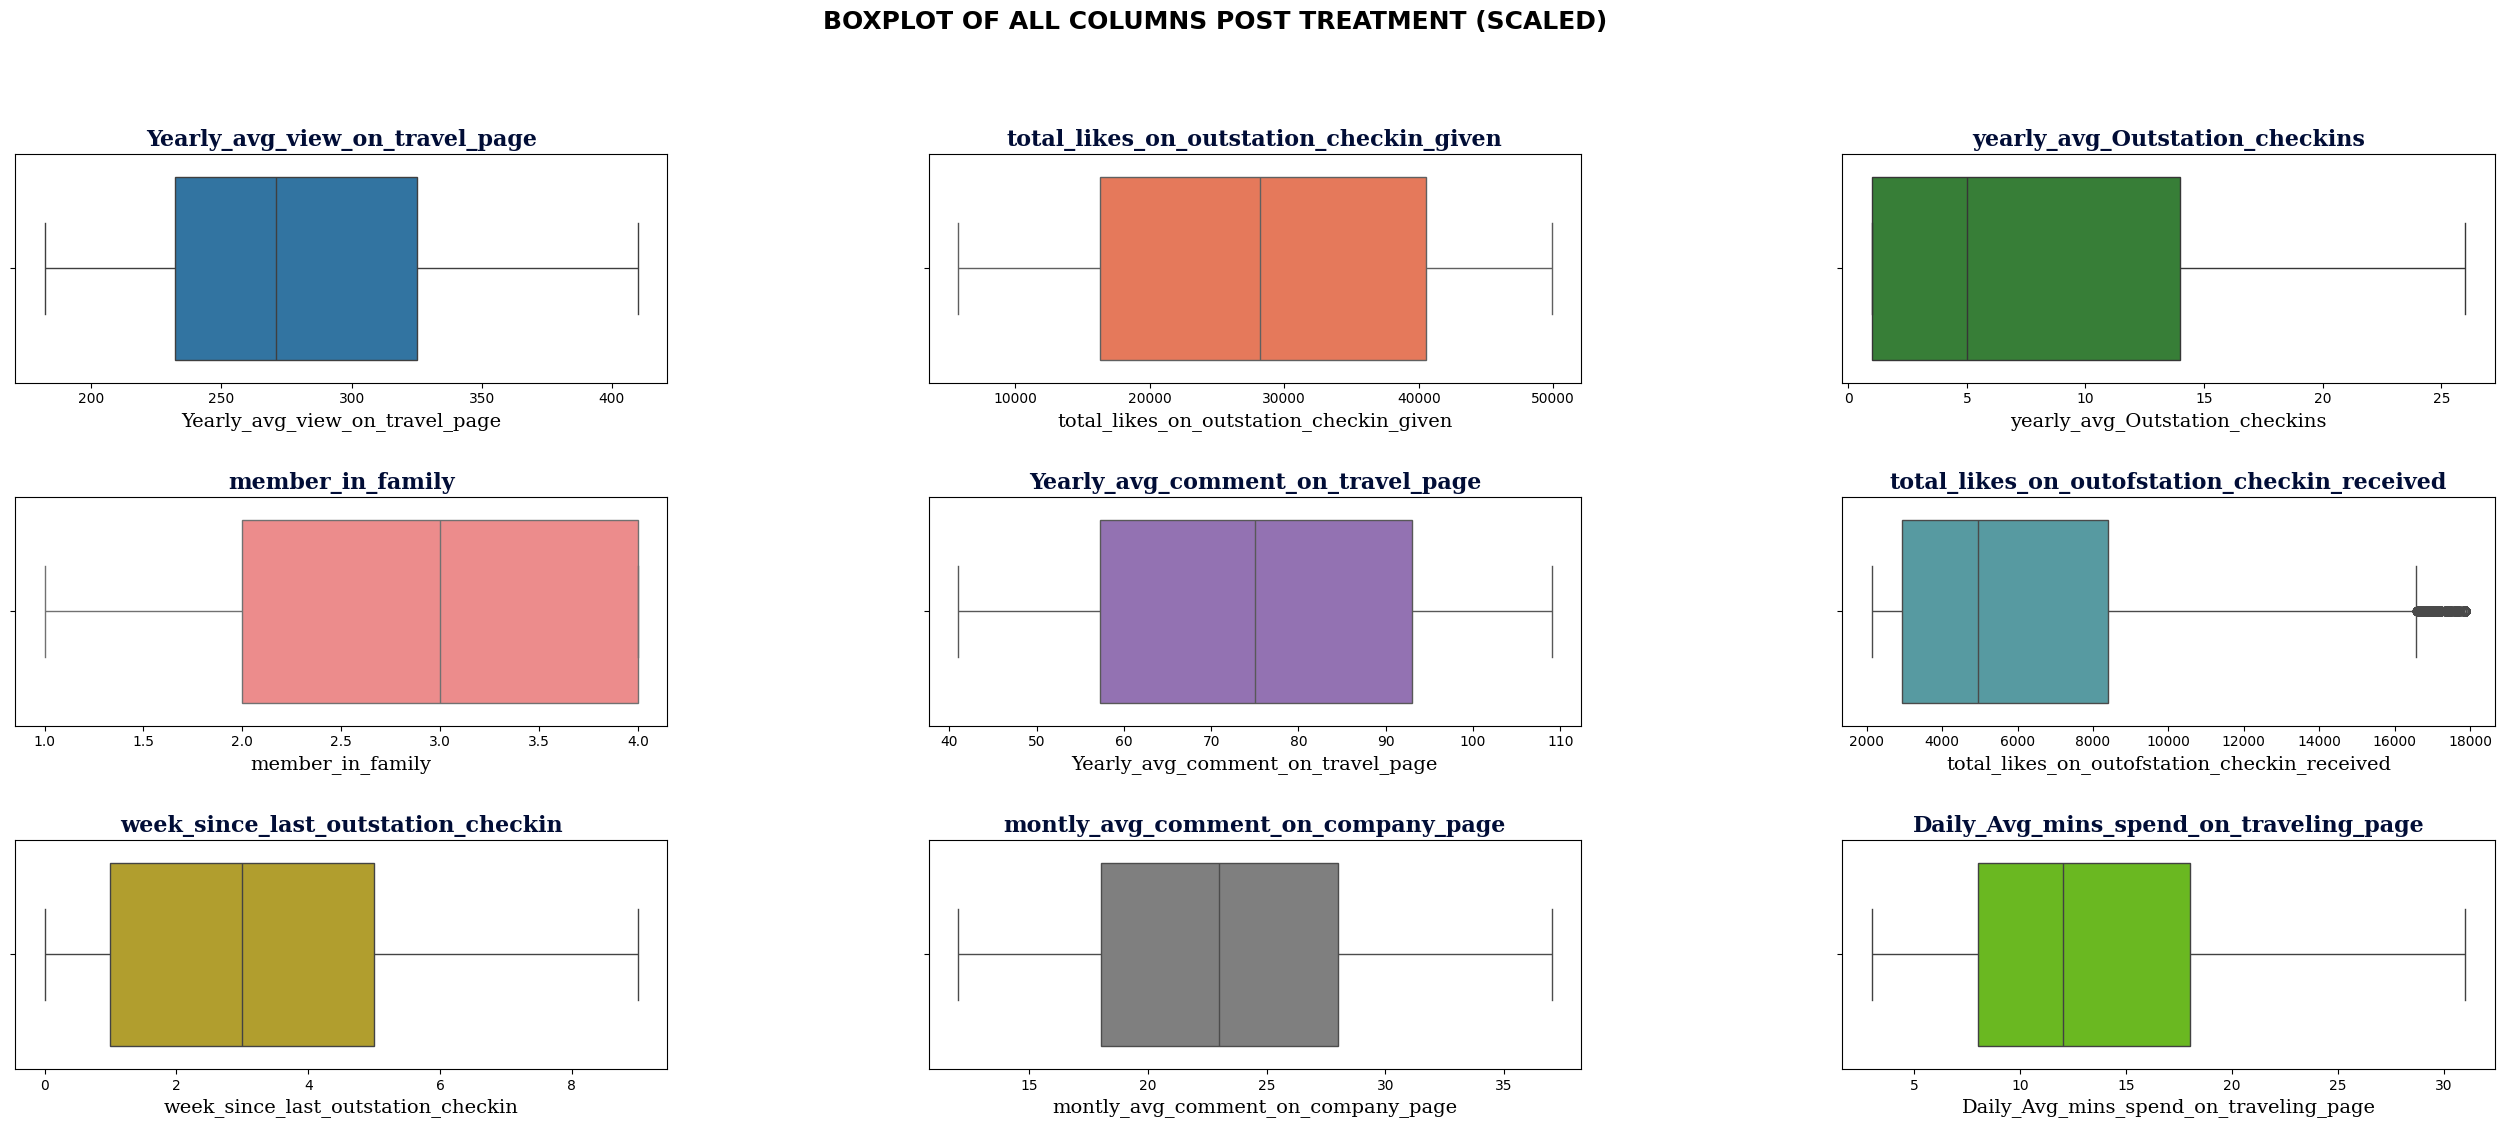

In [32]:
#Outliers in each Columns
plt.rcParams['axes.facecolor'] = 'white'
fig = plt.figure(figsize=[32,24])
fig.suptitle('BOXPLOT OF ALL COLUMNS POST TREATMENT (SCALED)', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(num_columns):
  ax1 = fig.add_subplot(6,3, i+1);
  ax1 = sns.boxplot(data = df, x=col ,  color= colours[i]);
  ax1.set_title(f'{col}', fontdict=axtitle_dict)
  ax1.set_xlabel(f'{col}', fontdict=axlab_dict)


数据所含信息

1. 设备偏好: 89.4% 的用户喜欢行动设备，因此优先考虑所有数位内容的行动优化，包括广告、网站和应用程式

2. 提高参与度：大多数用户（72%）不关注公司页面，这表明用户参与度存在潜在差距。制定策略，透过提供有价值且相关的内容来增加公司页面的追踪者。透过互动贴文、调查和促销活动吸引用户，以培养社群意识和忠诚度。

3. 了解非工作用户占大多数：非工作用户（84.62%）占主导地位，这表明需要客制化行销策略。考虑为该用户群提供灵活的旅游套餐、非高峰时段折扣或特别促销。

4. 解决旅游网路评级问题：评级分布，尤其是「3」（31.5%）和「4」（29.3%）的显著百分比，凸显了解决用户回馈的重要性。实施改进以提高整体满意度并提供积极的用户体验

5. 针对使用者细分进行人口统计客制化：考虑成人标志类别的多样化分布，其中「0」（42.8%）和「1」（40.6%）比例较大，根据使用者年龄层客制化服务和促销可以带来更有效的效果以及有针对性的行销工作。

---

## 建模

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score

In [34]:
# List of columns to encode
columns_to_encode = ['Taken_product', 'preferred_device', 'preferred_location_type', 'following_company_page', 'working_flag']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
  df[column] = label_encoder.fit_transform(df[column])

# Display the encoded DataFrame
df.head(5)

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,1,307.0,1,38570.0,1.0,2.0,3,94.0,5993.0,8.0,1,12.0,0,1,0.0,8.0
1,1000002,0,367.0,1,9765.0,1.0,1.0,3,61.0,5130.0,1.0,0,23.0,1,4,1.0,10.0
2,1000003,1,277.0,1,48055.0,1.0,2.0,10,92.0,2136.0,6.0,1,15.0,0,2,0.0,7.0
3,1000004,0,247.0,1,48720.0,1.0,4.0,3,56.0,2909.0,1.0,1,12.0,0,3,0.0,8.0
4,1000005,0,202.0,1,20685.0,1.0,1.0,7,41.0,3468.0,9.0,0,12.0,0,4,1.0,6.0


In [35]:
X = df.drop(['Daily_Avg_mins_spend_on_traveling_page', 'UserID'], axis=1)
y = df['Daily_Avg_mins_spend_on_traveling_page']

# X_ss = StandardScaler().fit_transform(X)
X_ss = MinMaxScaler().fit_transform(X)
X_ss = pd.DataFrame(X_ss, columns=X.columns)
X_ss.head()

# # Perform train-test split
# X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

# # Display the shapes of the resulting sets
# print("Train set shape - X:", X_train.shape, "y:", y_train.shape)
# print("Test set shape - X:", X_test.shape, "y:", y_test.shape)

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag
0,1.0,0.548246,1.0,0.743778,0.0,0.333333,0.214286,0.779412,0.245153,0.888889,1.0,0.00,0.0,0.000000,0.000000
1,0.0,0.811404,1.0,0.091029,0.0,0.000000,0.214286,0.294118,0.190300,0.111111,0.0,0.44,1.0,1.000000,0.333333
2,1.0,0.416667,1.0,0.958717,0.0,0.333333,0.714286,0.750000,0.000000,0.666667,1.0,0.12,0.0,0.333333,0.000000
3,0.0,0.285088,1.0,0.973787,0.0,1.000000,0.214286,0.220588,0.049132,0.111111,1.0,0.00,0.0,0.666667,0.000000
4,0.0,0.087719,1.0,0.338487,0.0,0.000000,0.500000,0.000000,0.084663,1.000000,0.0,0.00,0.0,1.000000,0.333333


In [36]:
X = df.drop(['Taken_product', 'UserID'], axis=1)
y = df['Taken_product']

# X_ss = StandardScaler().fit_transform(X)
X_ss = MinMaxScaler().fit_transform(X)
X_ss = pd.DataFrame(X_ss, columns=X.columns)
X_ss.head()

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Train set shape - X:", X_train.shape, "y:", y_train.shape)
print("Test set shape - X:", X_test.shape, "y:", y_test.shape)

Train set shape - X: (8363, 15) y: (8363,)
Test set shape - X: (2091, 15) y: (2091,)


<Axes: title={'center': 'Total label'}, xlabel='Taken_product'>

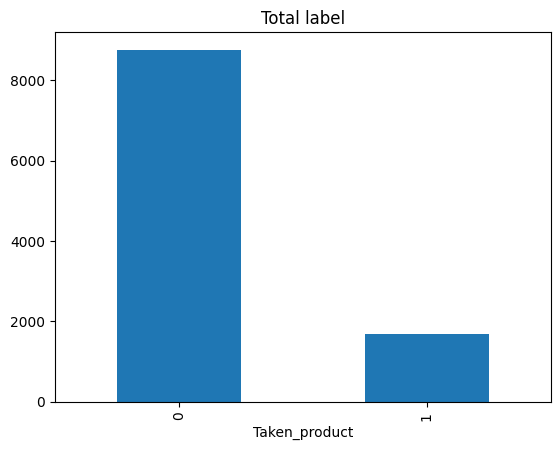

In [37]:
y.value_counts().plot.bar(title='Total label')

<Axes: title={'center': 'Train label'}, xlabel='Taken_product'>

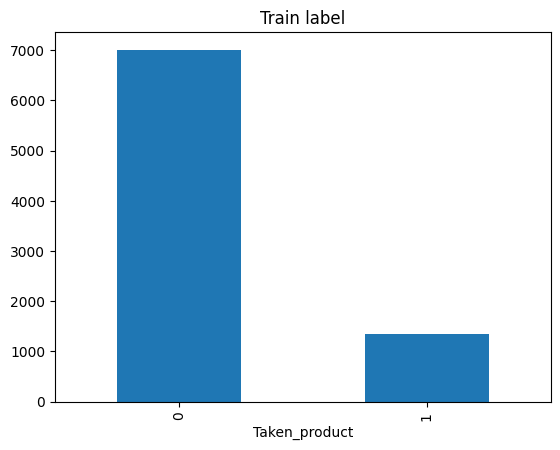

In [38]:
y_train.value_counts().plot.bar(title='Train label')

<Axes: title={'center': 'Test label'}, xlabel='Taken_product'>

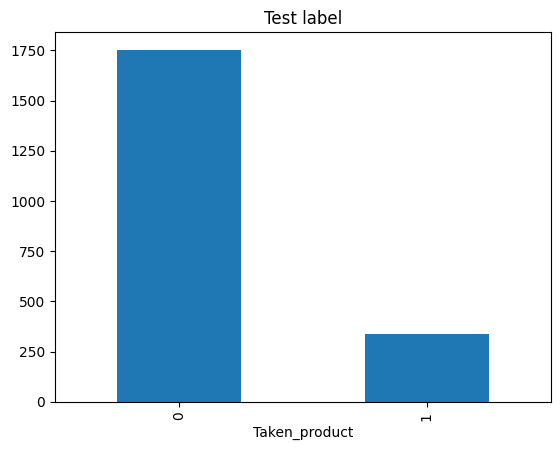

In [39]:
y_test.value_counts().plot.bar(title='Test label')

In [40]:
df.drop(['UserID'], axis=1).corr()['Taken_product'].sort_values().reset_index()

,index,Taken_product
0,Daily_Avg_mins_spend_on_traveling_page,-0.160728
1,total_likes_on_outofstation_checkin_received,-0.160109
2,Yearly_avg_view_on_travel_page,-0.151030
3,Adult_flag,-0.133031
4,preferred_device,-0.081452
5,total_likes_on_outstation_checkin_given,-0.052664
6,travelling_network_rating,-0.045796
7,member_in_family,-0.031531
8,montly_avg_comment_on_company_page,-0.011569
9,Yearly_avg_comment_on_travel_page,-0.008436


## 模型选择与分析

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [42]:
lr_model = LogisticRegression()

# Combine training and test sets for cross-validation
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(lr_model, X_combined, y_combined, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores.round(4))
print("Mean CV Accuracy:", cv_scores.mean().round(4))

# Train the model on the entire dataset
lr_model.fit(X_combined, y_combined)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate Random Forest on the test set
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))


Cross-Validation Scores: [0.8584 0.8551 0.8551 0.8589 0.8579]
Mean CV Accuracy: 0.8571

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      1753
           1       0.74      0.20      0.32       338

    accuracy                           0.86      2091
   macro avg       0.80      0.59      0.62      2091
weighted avg       0.84      0.86      0.82      2091



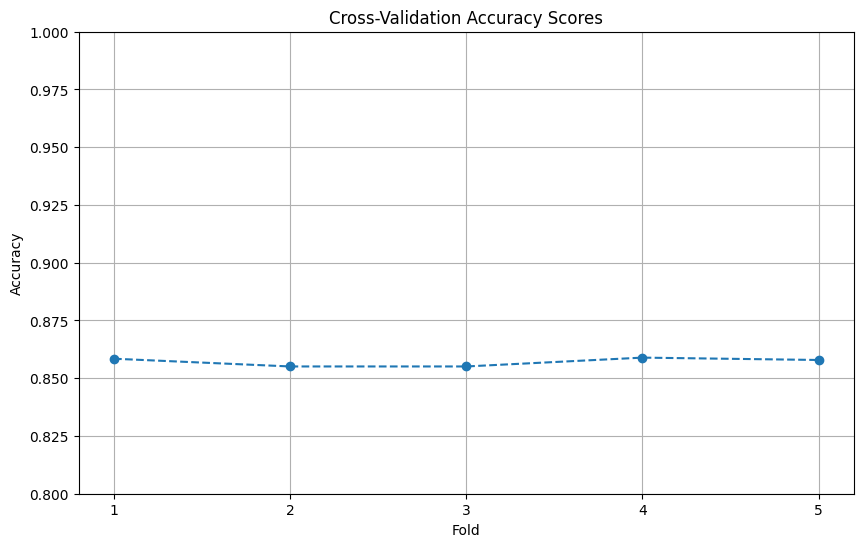

In [43]:
import matplotlib.pyplot as plt

# Assume cv_scores is already defined
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='--')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1])
plt.xticks(range(1, len(cv_scores) + 1))
plt.grid(True)
plt.show()


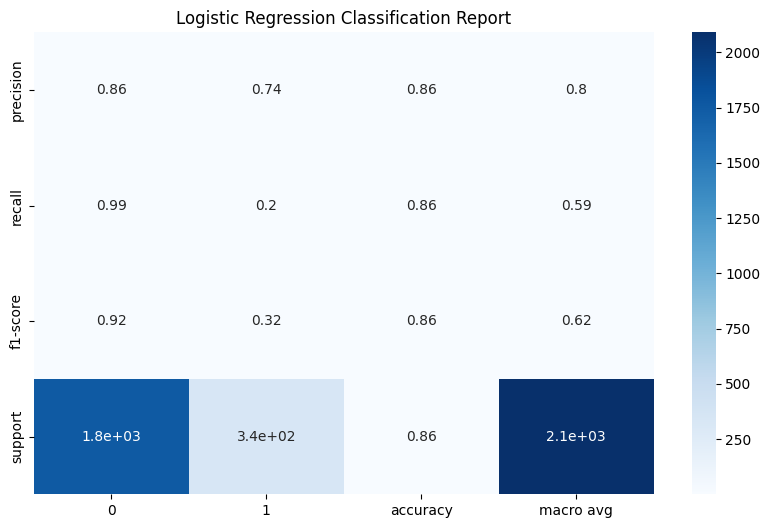

In [44]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report

# Assume that classification_report has been generated and saved in a variable
report = classification_report(y_test, lr_predictions, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Generate classification report heat map
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Logistic Regression Classification Report')
plt.show()


In [45]:
svm_model = SVC()

# Combine training and test sets for cross-validation
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(svm_model, X_combined, y_combined, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the entire dataset
svm_model.fit(X_combined, y_combined)

# Make predictions on the test set
svc_predictions = svm_model.predict(X_test)

# Evaluate Random Forest on the test set
print("\nSVC Classification Report:\n", classification_report(y_test, svc_predictions))

Cross-Validation Scores: [0.88235294 0.88761358 0.87613582 0.88522238 0.87751196]
Mean CV Accuracy: 0.8817673373468888

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1753
           1       0.93      0.37      0.53       338

    accuracy                           0.89      2091
   macro avg       0.91      0.68      0.74      2091
weighted avg       0.90      0.89      0.87      2091



In [46]:
dt_model = DecisionTreeClassifier(random_state=42)

# Combine training and test sets for cross-validation
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(dt_model, X_combined, y_combined, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the entire dataset
dt_model.fit(X_combined, y_combined)

# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate Random Forest on the test set
print("\Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))



Cross-Validation Scores: [0.97513152 0.98469632 0.97513152 0.98421808 0.98133971]
Mean CV Accuracy: 0.9801034279974097
\Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1753
           1       1.00      1.00      1.00       338

    accuracy                           1.00      2091
   macro avg       1.00      1.00      1.00      2091
weighted avg       1.00      1.00      1.00      2091



In [47]:
rf_model = RandomForestClassifier(n_estimators=100,max_depth=50,random_state=42)

# Combine training and test sets for cross-validation
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_combined, y_combined, cv=5)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Train the model on the entire dataset
rf_model.fit(X_combined, y_combined)

# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest on the test set
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Cross-Validation Scores: [0.98708752 0.98469632 0.98947872 0.9904352  0.98564593]
Mean CV Accuracy: 0.9874687370571987

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1753
           1       1.00      1.00      1.00       338

    accuracy                           1.00      2091
   macro avg       1.00      1.00      1.00      2091
weighted avg       1.00      1.00      1.00      2091



## 模型参数调整

由于在上一个阶段已经确定随机森林的表现为最好，因此本阶段对于随机森林模型进行参数调整，采用网格搜索的方法得出理想的模型参数。


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')  # Adjust cv and scoring as needed

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Test Accuracy:", accuracy)

In [ ]:
# Use the best parameter

rf_best = RandomForestClassifier(max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

# Combine training and test sets for cross-validation
X_combined = pd.concat([X_train, X_test])
y_combined = pd.concat([y_train, y_test])

cv_scores = cross_val_score(rf_best, X_combined, y_combined, cv=5)

# Train the model on the entire dataset
rf_best.fit(X_combined, y_combined)

# Make predictions on the test set
best_rf_predictions = rf_best.predict(X_test)

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("\Best Classification Report:\n", classification_report(y_test, best_rf_predictions))

# 混淆矩阵热力图

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assume y_test and best_rf_predictions are already defined
# Calculate the confusion matrix
cm = confusion_matrix(y_test, best_rf_predictions)

# Generate the heat map
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



## ROC 曲线

In [ ]:
from sklearn.metrics import RocCurveDisplay

# Generate the ROC Curve
plt.figure(figsize=(10,7))
RocCurveDisplay.from_estimator(rf_best, X_test, y_test)
plt.title('ROC Curve for Best Random Forest')
plt.show()

## 特征重要性

In [ ]:
def plot_feature_importance(clf, feature_names):
  feature_importance = clf.feature_importances_
  # make importances relative to max importance
  feature_importance = 100.0 * (feature_importance / feature_importance.max())
  sorted_idx = np.argsort(feature_importance)
  pos = np.arange(sorted_idx.shape[0]) + .5
  # plt.subplot(1, 2, 2)
  plt.figure(figsize=(12, 12*0.618))
  plt.barh(pos, feature_importance[sorted_idx], align='center', color='green', alpha=.3)
  # plt.yticks(pos, feature_names[sorted_idx])
  plt.yticks(pos, [feature_names[idx] for idx in sorted_idx], )
  plt.xlabel('Relative Importance')
  plt.title('Variable Importance')
  plt.grid(.3)
  plt.show()

In [ ]:
plot_feature_importance(clf=rf_model, feature_names=X.columns.tolist())